In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.io import loadmat
import pickle
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm

In [2]:
annots = pickle.load(open("reduced_workspace12_age.pkl",'rb'))
subDirectoryList = pickle.load(open("subDirectoryList.pkl", 'rb'))
subDirectoryListUpdate = pickle.load(open("subDirectoryList_update2022.pkl", 'rb'))
subDirectoryListUpdate2 = pickle.load(open("subDirectoryList_update2023.pkl", 'rb'))

In [3]:
for key in annots.keys():
    print(key, annots[key].shape)
print('---')
print(len(subDirectoryList))
print(len(subDirectoryListUpdate))
print(len(subDirectoryListUpdate2))

age1 (42881,)
age2 (42881,)
scan_number (45698,)
sex12 (42881,)
subject_IDs (45698,)
subject_IDs_orig (45698,)
subject_IDs_unique (42881,)
---
35259
39207
39206


In [4]:
dict1 = {}
dict1_keys = ['age1', 'age2', 'sex12', 'subject_IDs_unique']
dict2 = {}
dict2_keys = ['scan_number', 'subject_IDs', 'subject_IDs_orig']
for key in dict1_keys:
    dict1[key]=annots[key]
for key in dict2_keys:
    dict2[key]=annots[key]

In [5]:
if 'dummy' in subDirectoryListUpdate:
    subDirectoryListUpdate.remove('dummy')

In [6]:
df1 = pd.DataFrame.from_dict(dict1)
df2 = pd.DataFrame.from_dict(dict2)

subDirectoryList = [int(i) for i in subDirectoryList]
subDirectoryListUpdate = [int(float(i)) for i in subDirectoryListUpdate]
dict3 = {'subject_IDs': subDirectoryList}
# dict3 = {'subject_IDs': subDirectoryListUpdate}
df3 = pd.DataFrame.from_dict(dict3)
df3 = df3.drop_duplicates()

df23 = pd.merge(df2, df3, on='subject_IDs', how='inner')
df = pd.merge(df1, df23, left_on='subject_IDs_unique', right_on='subject_IDs_orig')
dfu = df[df.duplicated(['subject_IDs_unique'])]

In [7]:
# Find the difference between the original, IN USE, subDirectoryList and the updated one:
print(len(subDirectoryListUpdate) - len(subDirectoryList))
differenceSubjects = set(subDirectoryList).symmetric_difference(subDirectoryListUpdate)
print(len(differenceSubjects))

3947
3963


In [8]:
differenceSubjects = list(differenceSubjects)

In [9]:
df.head()

,age1,age2,sex12,subject_IDs_unique,scan_number,subject_IDs,subject_IDs_orig
0,66.493721,NaN,0,1000109,1,21000109,1000109
1,63.396918,NaN,1,1000260,1,21000260,1000260
2,60.338115,NaN,0,1000521,1,21000521,1000521
3,51.897146,NaN,0,1000657,1,21000657,1000657
4,53.017694,55.072489,0,1000811,1,21000811,1000811


In [10]:
df[df['subject_IDs'].isin(differenceSubjects)]

,age1,age2,sex12,subject_IDs_unique,scan_number,subject_IDs,subject_IDs_orig
1396,68.010845,NaN,1,1202715,1,21202715,1202715
1897,60.327511,NaN,0,1269692,1,21269692,1269692
7726,52.296233,NaN,0,2135288,1,22135288,2135288
17856,51.160845,53.358105,0,3622766,1,23622766,3622766
17857,51.160845,53.358105,0,3622766,2,33622766,3622766
24618,58.899590,NaN,0,4612030,1,24612030,4612030
29853,54.705137,NaN,0,5380068,1,25380068,5380068


In [11]:
rescanned_subjects = list(dfu['subject_IDs_unique'])
with open('rescanned_subjects.txt', 'w') as f:
    for item in rescanned_subjects:
        f.write("%s\n" % item)

In [12]:
print(len(dfu[dfu.sex12==0]))
print(len(dfu[dfu.sex12==1]))

1264
1169


In [13]:
dft = pd.concat([df,dfu]).drop_duplicates(subset='subject_IDs_unique', keep=False)
dft = dft.drop(dft[dft['scan_number']==2].index)

In [14]:
dft['sex'] = dft['sex12']
dft['age'] = dft['age1']
df_clean = dft.drop(columns=['age1', 'age2', 'sex12', 'subject_IDs_unique', 'scan_number', 'subject_IDs_orig'])

In [15]:
print("FOR THE WHOLE DATABASE")
print('---first scan---')
print("Male min, max, average:", np.min(df[df['sex12']==1]['age1']), np.max(df[df['sex12']==1]['age1']), np.mean(df[df['sex12']==1]['age1']))
print("Female min, max, average:", np.min(df[df['sex12']==0]['age1']), np.max(df[df['sex12']==0]['age1']), np.mean(df[df['sex12']==0]['age1']))
print('---second scan---')
print("Male min, max, average:", np.min(df[df['sex12']==1]['age2']), np.max(df[df['sex12']==1]['age2']), np.mean(df[df['sex12']==1]['age2']))
print("Female min, max, average:", np.min(df[df['sex12']==0]['age2']), np.max(df[df['sex12']==0]['age2']), np.mean(df[df['sex12']==0]['age2']))

FOR THE WHOLE DATABASE
---first scan---
Male min, max, average: 45.451940639269424 82.17979452054806 64.47428939683233
Female min, max, average: 45.12545662100456 82.26312785388131 63.22753994679938
---second scan---
Male min, max, average: 49.32705479452056 82.54577625570778 65.8753109458029
Female min, max, average: 50.23253424657537 82.58674863387978 64.72971118451396


In [16]:
print("FOR THE TRAIN DATABASE")
print("Male min, max, average:", np.min(df_clean[df_clean['sex']==1]['age']), np.max(df_clean[df_clean['sex']==1]['age']), np.mean(df_clean[df_clean['sex']==1]['age']))
print("Female min, max, average:", np.min(df_clean[df_clean['sex']==0]['age']), np.max(df_clean[df_clean['sex']==0]['age']), np.mean(df_clean[df_clean['sex']==0]['age']))

FOR THE TRAIN DATABASE
Male min, max, average: 45.451940639269424 82.17979452054806 64.64810970818492
Female min, max, average: 45.12545662100456 82.26312785388131 63.370316719492536


In [17]:
# df_clean.subject_IDs.to_list()

In [18]:
# Find intersection between the differenceSubjects (ie those who have been added to UKB since our jobs)
# and the ones we are working with.These need to be removed from our pipeline later. 

differenceSubjects = list(set(differenceSubjects) & set(df_clean.subject_IDs.to_list()))
print(len(differenceSubjects))
print(differenceSubjects)

# Need to be there: 25380068, 21269692
# At the Sept 2022 Update: [25380068, 22135288, 21202715, 21269692, 24612030]


5
[25380068, 22135288, 21202715, 21269692, 24612030]


## Based on this observation:

No age is lower than 45, and no age is higher than 83 - so we can update the model to predict between 43 and 83, rather than 44 and 84 

In [19]:
np.max(df_clean[df_clean['sex']==1]['age']) - np.min(df_clean[df_clean['sex']==1]['age'])

36.727853881278634

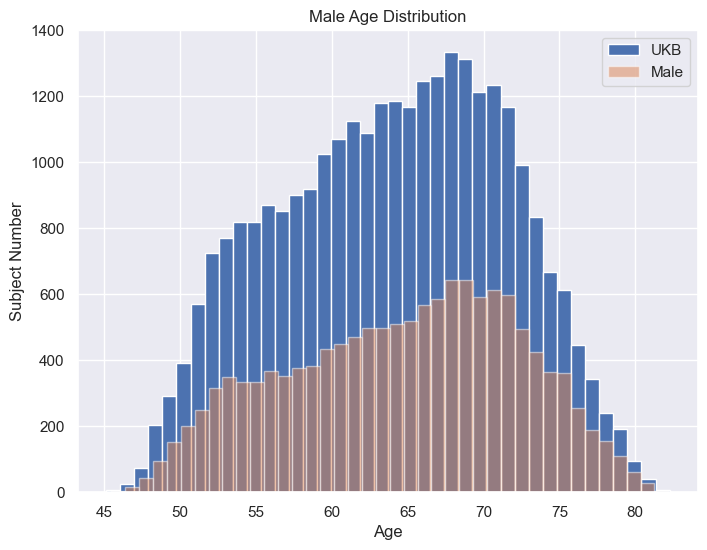

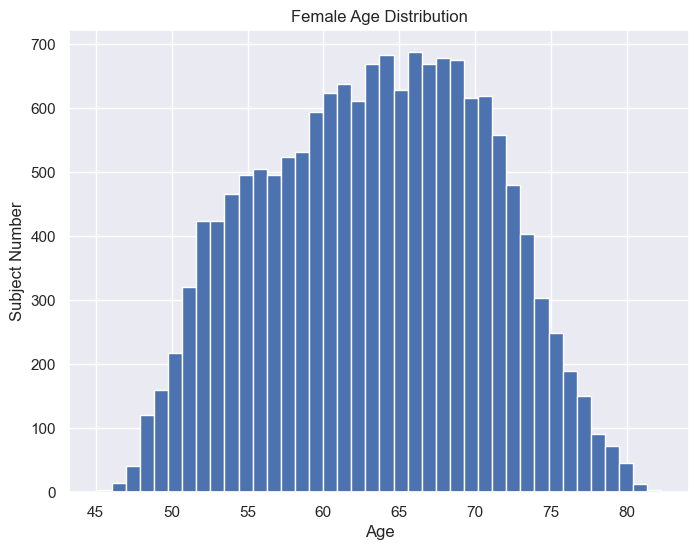

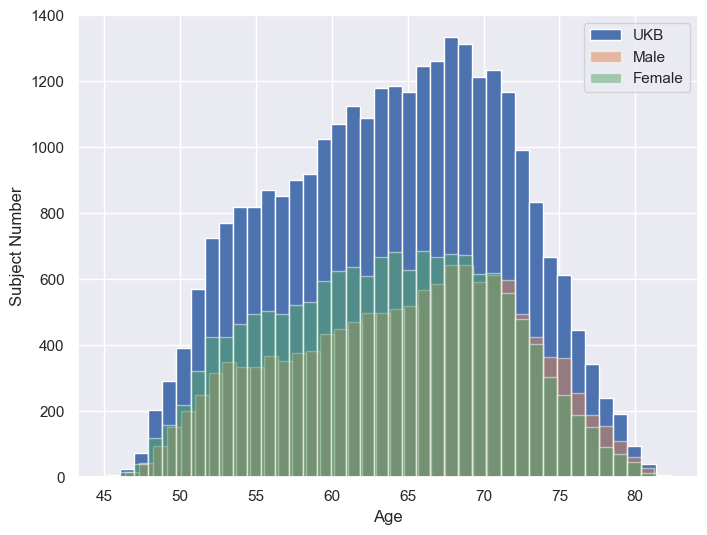

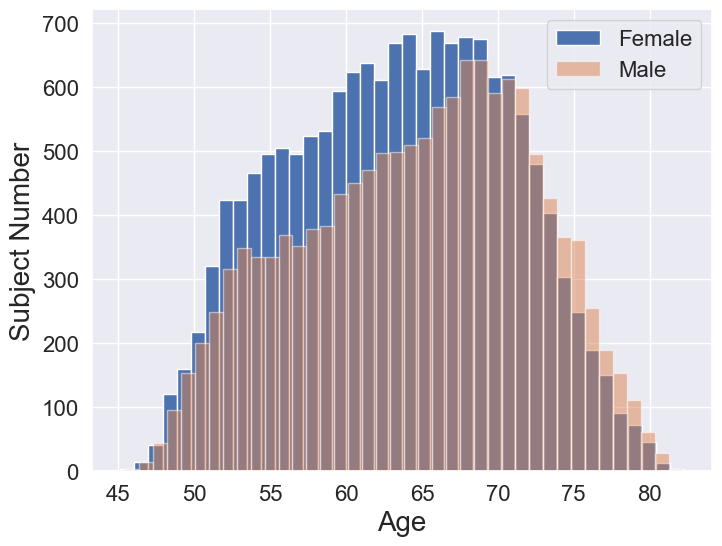

In [20]:
plt.figure(figsize=(8,6))
df_clean['age'].hist(bins=40, label='UKB')
df_clean[df_clean['sex']==1]['age'].hist(bins=40, label='Male', alpha=0.5)
plt.legend()
plt.title('Male Age Distribution')
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('ukb_male_age_distribution.png', dpi=300, facecolor='white', bbox_inches="tight")

plt.figure(figsize=(8,6))
df_clean[df_clean['sex']==0]['age'].hist(bins=40)
plt.title('Female Age Distribution')
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('ukb_female_age_distribution.png', dpi=300, facecolor='white', bbox_inches="tight")

plt.figure(figsize=(8,6))
df_clean['age'].hist(bins=40, label='UKB')
df_clean[df_clean['sex']==1]['age'].hist(bins=40, label='Male', alpha=0.5)
df_clean[df_clean['sex']==0]['age'].hist(bins=40, label='Female', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('ukb_male_female_age_distribution.png', dpi=300, facecolor='white', bbox_inches="tight")

plt.figure(figsize=(8,6))
df_clean[df_clean['sex']==0]['age'].hist(bins=40, label='Female')
df_clean[df_clean['sex']==1]['age'].hist(bins=40, label='Male', alpha=0.5)
plt.legend(fontsize=16)
plt.xlabel('Age', fontsize=20)
plt.xticks(fontsize=16)
plt.ylabel('Subject Number', fontsize=20)
plt.yticks(fontsize=16)
plt.savefig('ukb_male_female_age_distribution.png', facecolor='white', bbox_inches="tight")

In [21]:
df_male = df_clean[df_clean['sex']==1]
df_female = df_clean[df_clean['sex']==0]
df_male = df_male.drop(columns=['sex'])
df_female = df_female.drop(columns=['sex'])

In [22]:
print(len(df_male))
print(len(df_female))

13640
15691


In [23]:
cut_bins = np.arange(44,85)
cut_labels = cut_bins.astype('str')
cut_labels = cut_labels[:-1]

In [24]:
df_male['age_range'] = pd.cut(df_male['age'], bins=cut_bins, precision=0)
df_female['age_range'] = pd.cut(df_female['age'], bins=cut_bins, precision=0)

df_male['age_bins'] = pd.cut(df_male['age'], bins=cut_bins, labels=cut_labels, precision=0)
df_female['age_bins'] = pd.cut(df_female['age'], bins=cut_bins, labels=cut_labels, precision=0)

In [25]:
print("Mean Age:",df_male.age.mean())
print("Std Age:",df_male.age.std())

Mean Age: 64.64810970818492
Std Age: 7.61858630771564


In [26]:
print("Mean Age:",df_female.age.mean())
print("Std Age:",df_female.age.std())

Mean Age: 63.370316719492536
Std Age: 7.339524835028476


Total:  13640
Mean Age: 64.64810970818492
Std Age: 7.61858630771564
Train
Train:  8184
Mean Age: 64.63538766732178
Std Age: 7.64390819450124
Validation
Mean Age: 64.57829766322652
Val:  1091
Std Age: 7.569276740070685
Test
Test:  4365
Mean Age: 64.68941145468513
Std Age: 7.5847610269601216


Text(0, 0.5, 'Subject Number')

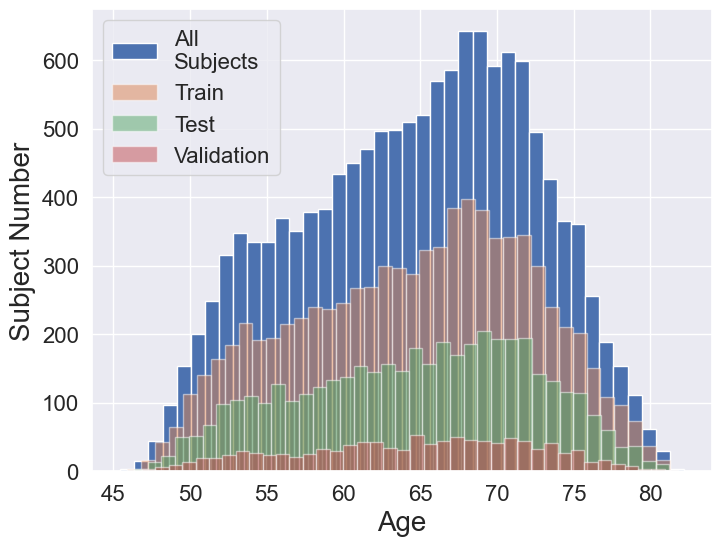

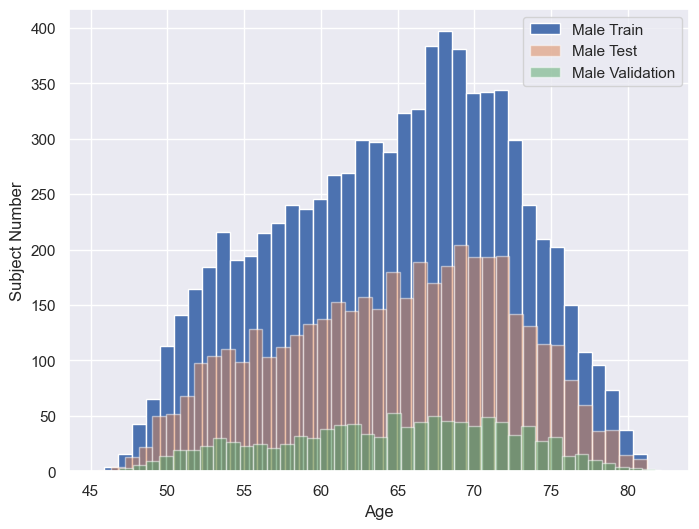

In [27]:
data_set = 13640
data_train = int(data_set * 0.6)
data_validation = int(data_set * 0.4 * 0.2)
data_test = int(data_set * 0.4 * 0.8)

df_data_set_male = df_male.sample(n=data_set, random_state=7)
df_data_train_male = df_data_set_male.sample(n=data_train, random_state=7)
df_data_set_male = pd.concat([df_data_set_male,df_data_train_male]).drop_duplicates(keep=False)
df_data_validation_male = df_data_set_male.sample(n=data_validation, random_state=7)
df_data_test_male = pd.concat([df_data_set_male,df_data_validation_male]).drop_duplicates(keep=False)

print("Total: ",len(df_male))
print("Mean Age:",df_male.age.mean())
print("Std Age:",df_male.age.std())
print("Train")
print("Train: ",len(df_data_train_male))
print("Mean Age:",df_data_train_male.age.mean())
print("Std Age:",df_data_train_male.age.std())
print("Validation")
print("Mean Age:",df_data_validation_male.age.mean())
print("Val: ",len(df_data_validation_male))
print("Std Age:",df_data_validation_male.age.std())
print("Test")
print("Test: ",len(df_data_test_male))
print("Mean Age:",df_data_test_male.age.mean())
print("Std Age:",df_data_test_male.age.std())

plt.figure(figsize=(8,6))
df_male['age'].hist(bins=40, label='All\nSubjects')
df_data_train_male['age'].hist(bins=40, label='Train', alpha=0.5)
df_data_test_male['age'].hist(bins=40, label='Test', alpha=0.5)
df_data_validation_male['age'].hist(bins=40, label='Validation', alpha=0.5)
plt.legend(fontsize=16)
plt.xlabel('Age', fontsize=20)
plt.xticks(fontsize=16)
plt.ylabel('Subject Number', fontsize=20)
plt.yticks(fontsize=16)
plt.savefig('large_male_age_distribution_full.png', facecolor='white', bbox_inches="tight")

plt.figure(figsize=(8,6))
df_data_train_male['age'].hist(bins=40, label='Male Train')
df_data_test_male['age'].hist(bins=40, label='Male Test', alpha=0.5)
df_data_validation_male['age'].hist(bins=40, label='Male Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('large_male_age_distribution.png', dpi=300, facecolor='white', bbox_inches="tight")

Train:  9414
Val:  1255
Test:  5022
---
Mean Age: 63.370316719492536
Std Age: 7.339524835028476
Train
Mean Age: 63.44137087731357
Std Age: 7.35443528183356
Validation
Mean Age: 63.32580674383087
Std Age: 7.409174197102213
Test
Mean Age: 63.24824507029465
Std Age: 7.293690602205822


Text(0, 0.5, 'Subject Number')

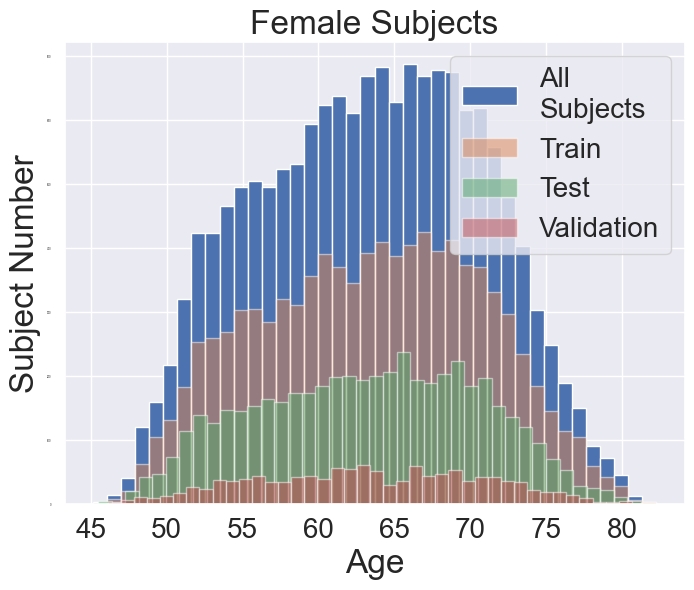

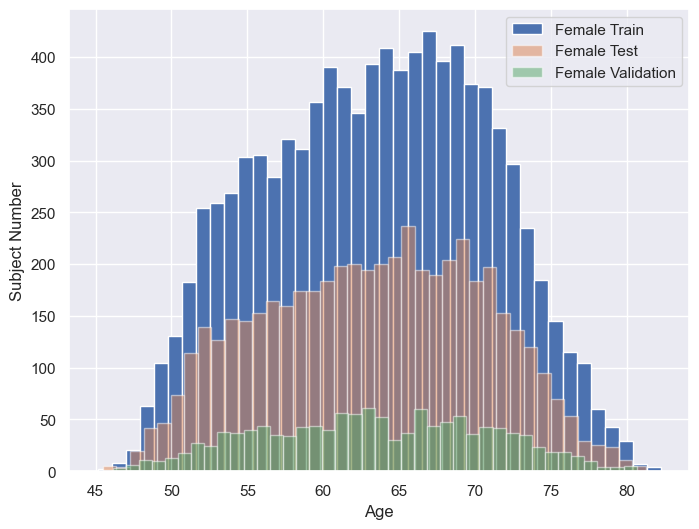

In [28]:
data_set = 15691
data_train = int(data_set * 0.6)
data_validation = int(data_set * 0.4 * 0.2)
data_test = int(data_set * 0.4 * 0.8)

df_data_set_female = df_female.sample(n=data_set, random_state=7)
df_data_train_female = df_data_set_female.sample(n=data_train, random_state=7)
df_data_set_female = pd.concat([df_data_set_female,df_data_train_female]).drop_duplicates(keep=False)
df_data_validation_female = df_data_set_female.sample(n=data_validation, random_state=7)
df_data_test_female = pd.concat([df_data_set_female,df_data_validation_female]).drop_duplicates(keep=False)

print("Train: ",len(df_data_train_female))
print("Val: ",len(df_data_validation_female))
print("Test: ",len(df_data_test_female))
print('---')
print("Mean Age:",df_female.age.mean())
print("Std Age:",df_female.age.std())
print("Train")
print("Mean Age:",df_data_train_female.age.mean())
print("Std Age:",df_data_train_female.age.std())
print("Validation")
print("Mean Age:",df_data_validation_female.age.mean())
print("Std Age:",df_data_validation_female.age.std())
print("Test")
print("Mean Age:",df_data_test_female.age.mean())
print("Std Age:",df_data_test_female.age.std())

plt.figure(figsize=(8,6))
df_female['age'].hist(bins=40, label='All\nSubjects')
df_data_train_female['age'].hist(bins=40, label='Train', alpha=0.5)
df_data_test_female['age'].hist(bins=40, label='Test', alpha=0.5)
df_data_validation_female['age'].hist(bins=40, label='Validation', alpha=0.5)
plt.legend(fontsize=20)
plt.xlabel('Age', fontsize=24)
plt.xticks(fontsize=20)
plt.ylabel('Subject Number', fontsize=24)
plt.yticks(fontsize=2)
plt.title('Female Subjects',fontsize=24)
plt.savefig('large_female_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

plt.figure(figsize=(8,6))
df_data_train_female['age'].hist(bins=40, label='Female Train')
df_data_test_female['age'].hist(bins=40, label='Female Test', alpha=0.5)
df_data_validation_female['age'].hist(bins=40, label='Female Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('large_female_age_distribution.png', dpi=300, facecolor='white', bbox_inches="tight")

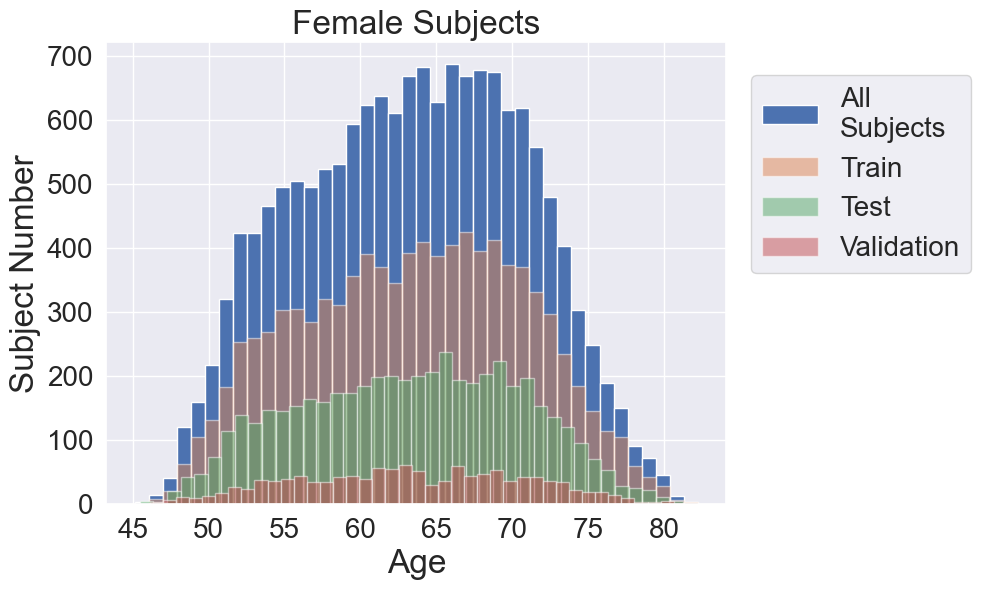

In [29]:
plt.figure(figsize=(8,6))
df_female['age'].hist(bins=40, label='All\nSubjects')
df_data_train_female['age'].hist(bins=40, label='Train', alpha=0.5)
df_data_test_female['age'].hist(bins=40, label='Test', alpha=0.5)
df_data_validation_female['age'].hist(bins=40, label='Validation', alpha=0.5)
plt.legend(fontsize=20, loc=(1.04, 0.5))
plt.xlabel('Age', fontsize=24)
plt.xticks(fontsize=20)
plt.ylabel('Subject Number', fontsize=24)
plt.yticks(fontsize=20)
plt.title('Female Subjects',fontsize=24)
plt.savefig('large_female_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

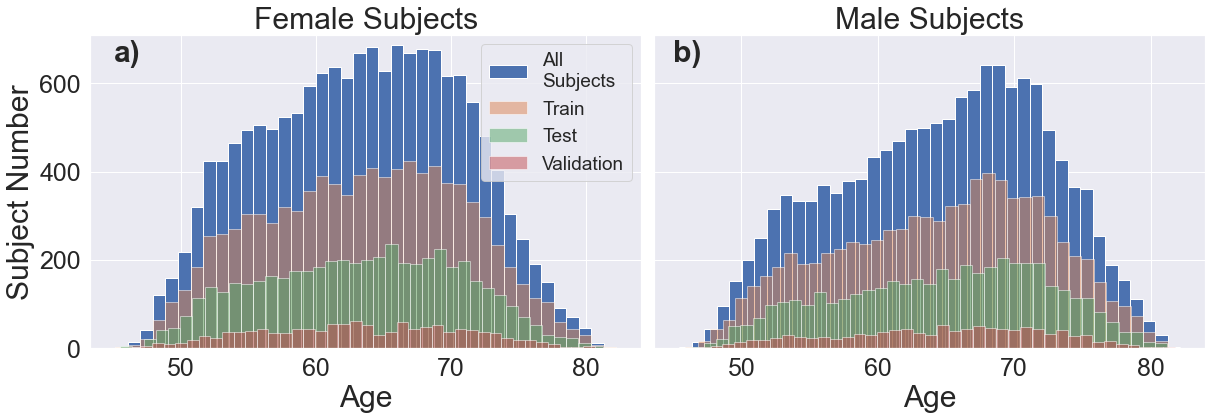

In [29]:
fontsize1 = 30
fontsize2 = 25
legendFont = 19

fix, ax = plt.subplots(1,2,figsize=(17, 6))
ax[0].hist(df_female.age, bins=40, label='All\nSubjects');
ax[0].hist(df_data_train_female['age'], bins=40, label='Train', alpha=0.5);
ax[0].hist(df_data_test_female['age'], bins=40, label='Test', alpha=0.5);
ax[0].hist(df_data_validation_female['age'], bins=40, label='Validation', alpha=0.5);
ax[0].legend(fontsize=legendFont)
ax[0].set_xlabel('Age', fontsize=fontsize1)
ax[0].set_ylabel('Subject Number', fontsize=fontsize1)
ax[0].tick_params(axis='both', labelsize=fontsize2)
ax[0].set_ylim([0, 710])
ax[0].set_title('Female Subjects', fontsize=fontsize1)
ax[0].text(45, 650, 'a)', fontweight='bold', fontsize=30)

ax[1].hist(df_male.age, bins=40, label='All\nSubjects');
ax[1].hist(df_data_train_male['age'], bins=40, label='Train', alpha=0.5);
ax[1].hist(df_data_test_male['age'], bins=40, label='Test', alpha=0.5);
ax[1].hist(df_data_validation_male['age'], bins=40, label='Validation', alpha=0.5);
# ax[1].legend(fontsize=fontsize2)
ax[1].set_xlabel('Age', fontsize=fontsize1)
ax[1].set_ylim([0, 710])
ax[1].axes.yaxis.set_ticklabels([])
ax[1].tick_params(axis='both', labelsize=fontsize2)
ax[1].set_title('Male Subjects', fontsize=fontsize1)
ax[1].text(45, 650, 'b)', fontweight='bold', fontsize=30)

plt.tight_layout()

plt.savefig('large_femaleMale_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

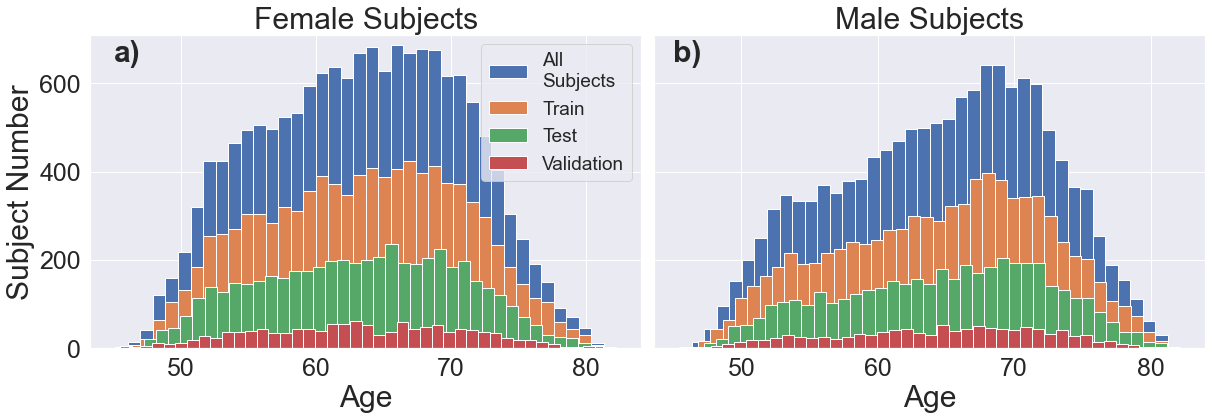

In [30]:
fontsize1 = 30
fontsize2 = 25
legendFont = 19

fix, ax = plt.subplots(1,2,figsize=(17, 6))
ax[0].hist(df_female.age, bins=40, label='All\nSubjects');
ax[0].hist(df_data_train_female['age'], bins=40, label='Train');
ax[0].hist(df_data_test_female['age'], bins=40, label='Test');
ax[0].hist(df_data_validation_female['age'], bins=40, label='Validation');
ax[0].legend(fontsize=legendFont)
ax[0].set_xlabel('Age', fontsize=fontsize1)
ax[0].set_ylabel('Subject Number', fontsize=fontsize1)
ax[0].tick_params(axis='both', labelsize=fontsize2)
ax[0].set_ylim([0, 710])
ax[0].set_title('Female Subjects', fontsize=fontsize1)
ax[0].text(45, 650, 'a)', fontweight='bold', fontsize=30)

ax[1].hist(df_male.age, bins=40, label='All\nSubjects');
ax[1].hist(df_data_train_male['age'], bins=40, label='Train');
ax[1].hist(df_data_test_male['age'], bins=40, label='Test');
ax[1].hist(df_data_validation_male['age'], bins=40, label='Validation');
# ax[1].legend(fontsize=fontsize2)
ax[1].set_xlabel('Age', fontsize=fontsize1)
ax[1].set_ylim([0, 710])
ax[1].axes.yaxis.set_ticklabels([])
ax[1].tick_params(axis='both', labelsize=fontsize2)
ax[1].set_title('Male Subjects', fontsize=fontsize1)
ax[1].text(45, 650, 'b)', fontweight='bold', fontsize=30)

plt.tight_layout()

plt.savefig('large_femaleMale_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

In [31]:
from functools import reduce

list(reduce(set.intersection, map(set, [df_data_train_female['subject_IDs'], df_data_test_female['subject_IDs'], df_data_validation_female['subject_IDs']])))

[]

In [32]:
print(list(reduce(set.intersection, map(set, [df_data_train_female['subject_IDs'], df_data_test_female['subject_IDs'] ]))))
print(list(reduce(set.intersection, map(set, [df_data_train_female['subject_IDs'], df_data_validation_female['subject_IDs']]))))
print(list(reduce(set.intersection, map(set, [df_data_test_female['subject_IDs'], df_data_validation_female['subject_IDs']]))))

[]
[]
[]


In [33]:
print(list(reduce(set.intersection, map(set, [df_data_train_male['subject_IDs'], df_data_test_male['subject_IDs'] ]))))
print(list(reduce(set.intersection, map(set, [df_data_train_male['subject_IDs'], df_data_validation_male['subject_IDs']]))))
print(list(reduce(set.intersection, map(set, [df_data_test_male['subject_IDs'], df_data_validation_male['subject_IDs']]))))

[]
[]
[]


In [34]:
male_train = df_data_train_male['subject_IDs'].to_numpy(dtype='str')
male_test = df_data_test_male['subject_IDs'].to_numpy(dtype='str')
male_validation = df_data_validation_male['subject_IDs'].to_numpy(dtype='str')

female_train = df_data_train_female['subject_IDs'].to_numpy(dtype='str')
female_test = df_data_test_female['subject_IDs'].to_numpy(dtype='str')
female_validation = df_data_validation_female['subject_IDs'].to_numpy(dtype='str')

male_train_age = df_data_train_male['age'].to_numpy()
male_test_age = df_data_test_male['age'].to_numpy()
male_validation_age = df_data_validation_male['age'].to_numpy()

female_train_age = df_data_train_female['age'].to_numpy()
female_test_age = df_data_test_female['age'].to_numpy()
female_validation_age = df_data_validation_female['age'].to_numpy()

In [35]:
from sklearn.model_selection import train_test_split

male_testA, male_testB = train_test_split(male_test, test_size=0.5, random_state=1)
female_testA, female_testB = train_test_split(female_test, test_size=0.5, random_state=1)

male_testA_age, male_testB_age = train_test_split(male_test_age, test_size=0.5, random_state=1)
female_testA_age, female_testB_age = train_test_split(female_test_age, test_size=0.5, random_state=1)


In [36]:
# [25380068, 22135288, 21202715, 21269692, 24612030]

def correctSubjects(subjects, ages, subjects_to_be_ignored):
    
    idx_elim = np.intersect1d(subjects, subjects_to_be_ignored, return_indices=True)[1]
    print(idx_elim)
    subjects = np.delete(subjects, idx_elim)
    ages = np.delete(ages, idx_elim)
    
    return subjects, ages

In [37]:
differenceSubjects = [str(i) for i in differenceSubjects]
differenceSubjects

['25380068', '22135288', '21202715', '21269692', '24612030']

In [38]:
male_train, male_train_age = correctSubjects(male_train, male_train_age, differenceSubjects)
male_test, male_test_age = correctSubjects(male_test, male_test_age, differenceSubjects)
male_validation, male_validation_age = correctSubjects(male_validation, male_validation_age, differenceSubjects)

female_train, female_train_age = correctSubjects(female_train, female_train_age, differenceSubjects)
female_test, female_test_age = correctSubjects(female_test, female_test_age, differenceSubjects)
female_validation, female_validation_age = correctSubjects(female_validation, female_validation_age,
                                                           differenceSubjects)

male_testA, male_testA_age = correctSubjects(male_testA, male_testA_age, differenceSubjects)
male_testB, male_testB_age = correctSubjects(male_testB, male_testB_age, differenceSubjects)

female_testA, female_testA_age = correctSubjects(female_testA, female_testA_age, differenceSubjects)
female_testB, female_testB_age = correctSubjects(female_testB, female_testB_age, differenceSubjects)

[]
[3262]
[]
[7756 2311]
[ 145 2644]
[]
[]
[1398]
[2305]
[2121]


In [39]:
print('Male')
print(len(male_train), len(male_train_age))
print(len(male_test), len(male_test_age))
print(len(male_testA), len(male_testA_age))
print(len(male_testB), len(male_testB_age))
print(len(male_validation), len(male_validation_age))
# Train:  8184
# Val:  1091
# Test:  4365
print('Female')
print(len(female_train), len(female_train_age))
print(len(female_test), len(female_test_age))
print(len(female_testA), len(female_testA_age))
print(len(female_testB), len(female_testB_age))
print(len(female_validation), len(female_validation_age))
# Train:  9414
# Val:  1255
# Test:  5022

Male
8184 8184
4364 4364
2182 2182
2182 2182
1091 1091
Female
9412 9412
5020 5020
2510 2510
2510 2510
1255 1255


In [40]:
np.savetxt('male_train.txt', male_train, fmt='%s')
np.savetxt('male_test.txt', male_test, fmt='%s')
np.savetxt('male_validation.txt', male_validation, fmt='%s')
np.savetxt('female_train.txt', female_train, fmt='%s')
np.savetxt('female_test.txt', female_test, fmt='%s')
np.savetxt('female_validation.txt', female_validation, fmt='%s')

np.save('male_train_age.npy', male_train_age)
np.save('male_test_age.npy', male_test_age)
np.save('male_validation_age.npy', male_validation_age)
np.save('female_train_age.npy', female_train_age)
np.save('female_test_age.npy', female_test_age)
np.save('female_validation_age.npy', female_validation_age)

np.savetxt('male_testA.txt', male_testA, fmt='%s')
np.savetxt('male_testB.txt', male_testB, fmt='%s')
np.savetxt('female_testA.txt', female_testA, fmt='%s')
np.savetxt('female_testB.txt', female_testB, fmt='%s')

np.save('male_testA_age.npy', male_testA_age)
np.save('male_testB_age.npy', male_testB_age)
np.save('female_testA_age.npy', female_testA_age)
np.save('female_testB_age.npy', female_testB_age)

In [41]:
np.savetxt('female_testA.txt', female_testA, fmt='%s')
np.savetxt('female_testB.txt', female_testB, fmt='%s')
np.savetxt('fefemale_testA.txt', fefemale_testA, fmt='%s')
np.savetxt('fefemale_testB.txt', fefemale_testB, fmt='%s')

np.save('female_testA_age.npy', female_testA_age)
np.save('female_testB_age.npy', female_testB_age)
np.save('fefemale_testA_age.npy', fefemale_testA_age)
np.save('fefemale_testB_age.npy', fefemale_testB_age)

NameError: name 'fefemale_testA' is not defined

In [42]:
female_testB

array(['25731272', '23327192', '21569423', ..., '23169754', '25240989',
       '22940930'], dtype='<U11')

In [43]:
female_testB_age

array([59.31107306, 67.5239071 , 72.23687215, ..., 57.6181694 ,
       73.83504566, 56.18687215])

In [44]:
def num2vec(label, bin_range, bin_step=1, std=1):

#     std = 10 # THIS IS A HARDCODING! COMMENT OUT!
    
    bin_start = bin_range[0]
    bin_end = bin_range[1]
    bin_length = bin_end - bin_start
    if bin_length % bin_step != 0:
        print("Error: Bin range should be divisible by the bin step!")
        return None
    bin_number = int(bin_length / bin_step)
    bin_centers = bin_start + bin_step/2.0 + bin_step * np.arange(bin_number)
    
    if std == 0:
        # Uniform Distribution Case
        label = np.array(label)
        bin_values = np.floor((label - bin_start)/bin_step).astype(int)
    elif std < 0:
        print("Error! The standard deviation (& variance) must be positive")
        return None
    else:
        bin_values = np.zeros((bin_number))
        for i in range(bin_number):
            x1 = bin_centers[i] - bin_step/2.0
            x2 = bin_centers[i] + bin_step/2.0
            cdfs = norm.cdf([x1, x2], loc=label, scale=std)
            bin_values[i] = cdfs[1] - cdfs[0]       

    return bin_values, bin_centers

In [45]:
# bin_range = [44,84]
bin_range = [39,89]
bin_step = 1

# print("Generating male_train_age_labels")
# male_train_age_labels = []
# for label in male_train_age:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     male_train_age_labels.append(bin_values)
# male_train_age_labels = np.array(male_train_age_labels)
# np.save('male_train_age_labels.npy', male_train_age_labels)

# print("Generating male_test_age_labels")
# male_test_age_labels = []
# for label in male_test_age:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     male_test_age_labels.append(bin_values)
# male_test_age_labels = np.array(male_test_age_labels)
# np.save('male_test_age_labels.npy', male_test_age_labels)

# print("Generating male_validation_age_labels")   
# male_validation_age_labels = []
# for label in male_validation_age:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     male_validation_age_labels.append(bin_values)
# male_validation_age_labels = np.array(male_validation_age_labels)
# np.save('male_validation_age_labels.npy', male_validation_age_labels)

# print("Generating female_train_age_labels") 
# female_train_age_labels = []
# for label in female_train_age:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     female_train_age_labels.append(bin_values)
# female_train_age_labels = np.array(female_train_age_labels)
# np.save('female_train_age_labels.npy', female_train_age_labels)

print("Generating female_test_age_labels") 
female_test_age_labels = []
for label in female_test_age:
    bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=10)
    female_test_age_labels.append(bin_values)
female_test_age_labels = np.array(female_test_age_labels)
np.save('female_test_age_labels_50b10s.npy', female_test_age_labels)

# female_validation_age_labels = []
# for label in female_validation_age:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     female_validation_age_labels.append(bin_values)
# female_validation_age_labels = np.array(female_validation_age_labels)
# np.save('female_validation_age_labels.npy', female_validation_age_labels)

Generating female_test_age_labels


In [46]:
bin_centers.shape

(50,)

In [47]:
np.save('bin_centers_50b10s.npy', bin_centers)

24806531
67.67066210045664
subject_IDs     24806531
age            67.670662
age_range       (67, 68]
age_bins              67
Name: 25948, dtype: object


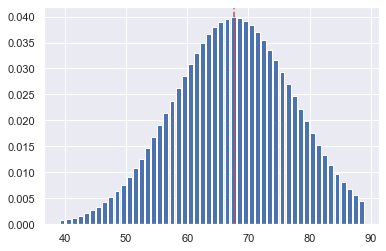

In [48]:
# print(male_train[3022])
# print(male_train_age[3022])
# print(df_data_train_male.iloc[3022])
# plt.bar(bin_centers, male_train_age_labels[3022])
# plt.axvline(x=male_train_age[3022], ymin=0, ymax=1, c='r', ls='--')
# plt.show()
# print('---')
print(female_test[0])
print(female_test_age[0])
print(df_data_test_female.iloc[0])
plt.bar(bin_centers, female_test_age_labels[0])
plt.axvline(x=female_test_age[0], ymin=0, ymax=1, c='r', ls='--')
plt.show()

Train:  3000
Val:  1000
Test:  1000
Mean Age: 64.64810970818507
Std Age: 7.618586307715635
Train
Mean Age: 64.44089290740312
Std Age: 7.668519683642717
Validation
Mean Age: 64.76450939067298
Std Age: 7.825825823790007
Test
Mean Age: 64.94440705891161
Std Age: 7.286740329751538


Text(0, 0.5, 'Subject Number')

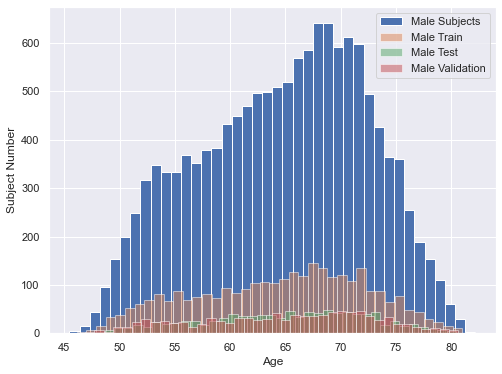

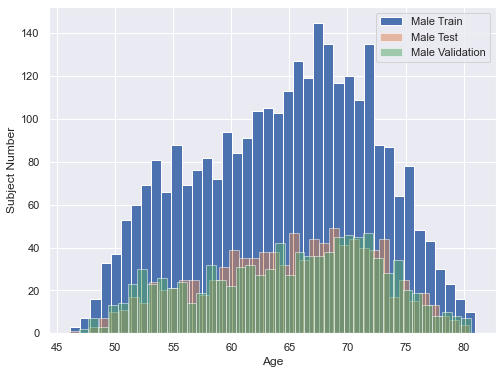

In [49]:
data_set = 5000
data_train = int(data_set * 0.6)
data_validation = int(data_set * 0.2)
data_test = int(data_set * 0.2)

df_data_set_male_small = df_male.sample(n=data_set, random_state=7)
df_data_train_male_small = df_data_set_male_small.sample(n=data_train, random_state=7)
df_data_set_male_small = pd.concat([df_data_set_male_small,df_data_train_male_small]).drop_duplicates(keep=False)
df_data_validation_male_small = df_data_set_male_small.sample(n=data_validation, random_state=7)
df_data_test_male_small = pd.concat([df_data_set_male_small,df_data_validation_male_small]).drop_duplicates(keep=False)

print("Train: ",len(df_data_train_male_small))
print("Val: ",len(df_data_validation_male_small))
print("Test: ",len(df_data_test_male_small))

print("Mean Age:",df_male.age.mean())
print("Std Age:",df_male.age.std())
print("Train")
print("Mean Age:",df_data_train_male_small.age.mean())
print("Std Age:",df_data_train_male_small.age.std())
print("Validation")
print("Mean Age:",df_data_validation_male_small.age.mean())
print("Std Age:",df_data_validation_male_small.age.std())
print("Test")
print("Mean Age:",df_data_test_male_small.age.mean())
print("Std Age:",df_data_test_male_small.age.std())

plt.figure(figsize=(8,6))
df_male['age'].hist(bins=40, label='Male Subjects')
df_data_train_male_small['age'].hist(bins=40, label='Male Train', alpha=0.5)
df_data_test_male_small['age'].hist(bins=40, label='Male Test', alpha=0.5)
df_data_validation_male_small['age'].hist(bins=40, label='Male Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('small_male_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

plt.figure(figsize=(8,6))
df_data_train_male_small['age'].hist(bins=40, label='Male Train')
df_data_test_male_small['age'].hist(bins=40, label='Male Test', alpha=0.5)
df_data_validation_male_small['age'].hist(bins=40, label='Male Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('small_male_age_distribution.png', dpi=300, facecolor='white', bbox_inches="tight")

Train:  3000
Val:  1000
Test:  1000
Mean Age: 63.37031671949257
Std Age: 7.339524835028476
Train
Mean Age: 63.27202939965569
Std Age: 7.347996474622916
Validation
Mean Age: 63.62944275769143
Std Age: 7.306435803739582
Test
Mean Age: 63.417774706190556
Std Age: 7.443580003865531


Text(0, 0.5, 'Subject Number')

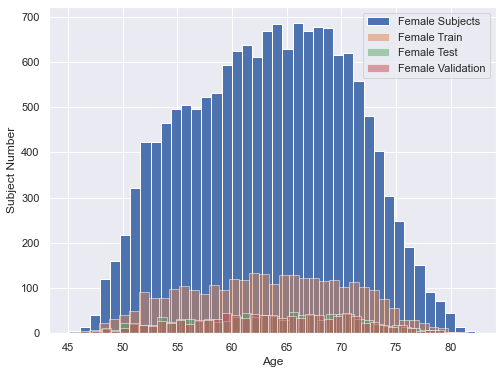

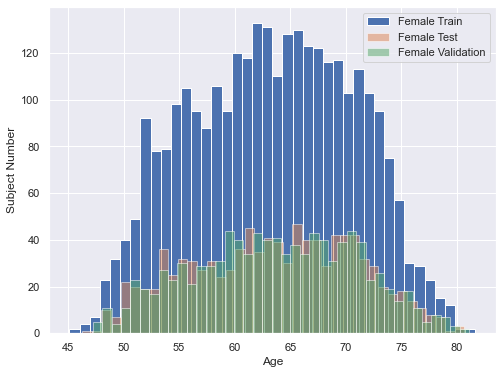

In [50]:
data_set_ = 5000
data_train = int(data_set * 0.6)
data_validation = int(data_set * 0.2)
data_test = int(data_set * 0.2)

df_data_set_female_small = df_female.sample(n=data_set, random_state=7)
df_data_train_female_small = df_data_set_female_small.sample(n=data_train, random_state=7)
df_data_set_female_small = pd.concat([df_data_set_female_small,df_data_train_female_small]).drop_duplicates(keep=False)
df_data_validation_female_small = df_data_set_female_small.sample(n=data_validation, random_state=7)
df_data_test_female_small = pd.concat([df_data_set_female_small,df_data_validation_female_small]).drop_duplicates(keep=False)

print("Train: ",len(df_data_train_female_small))
print("Val: ",len(df_data_validation_female_small))
print("Test: ",len(df_data_test_female_small))

print("Mean Age:",df_female.age.mean())
print("Std Age:",df_female.age.std())
print("Train")
print("Mean Age:",df_data_train_female_small.age.mean())
print("Std Age:",df_data_train_female_small.age.std())
print("Validation")
print("Mean Age:",df_data_validation_female_small.age.mean())
print("Std Age:",df_data_validation_female_small.age.std())
print("Test")
print("Mean Age:",df_data_test_female_small.age.mean())
print("Std Age:",df_data_test_female_small.age.std())

plt.figure(figsize=(8,6))
df_female['age'].hist(bins=40, label='Female Subjects')
df_data_train_female_small['age'].hist(bins=40, label='Female Train', alpha=0.5)
df_data_test_female_small['age'].hist(bins=40, label='Female Test', alpha=0.5)
df_data_validation_female_small['age'].hist(bins=40, label='Female Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('small_female_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

plt.figure(figsize=(8,6))
df_data_train_female_small['age'].hist(bins=40, label='Female Train')
df_data_test_female_small['age'].hist(bins=40, label='Female Test', alpha=0.5)
df_data_validation_female_small['age'].hist(bins=40, label='Female Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('small_female_age_distribution.png', dpi=300, facecolor='white', bbox_inches="tight")

In [51]:
male_train_small = df_data_train_male_small['subject_IDs'].to_numpy(dtype='str')
male_test_small = df_data_test_male_small['subject_IDs'].to_numpy(dtype='str')
male_validation_small = df_data_validation_male_small['subject_IDs'].to_numpy(dtype='str')

female_train_small = df_data_train_female_small['subject_IDs'].to_numpy(dtype='str')
female_test_small = df_data_test_female_small['subject_IDs'].to_numpy(dtype='str')
female_validation_small = df_data_validation_female_small['subject_IDs'].to_numpy(dtype='str')

male_train_age_small = df_data_train_male_small['age'].to_numpy()
male_test_age_small = df_data_test_male_small['age'].to_numpy()
male_validation_age_small = df_data_validation_male_small['age'].to_numpy()

female_train_age_small = df_data_train_female_small['age'].to_numpy()
female_test_age_small = df_data_test_female_small['age'].to_numpy()
female_validation_age_small = df_data_validation_female_small['age'].to_numpy()



male_train_small, male_train_age_small = correctSubjects(male_train_small, male_train_age_small, 
                                                         differenceSubjects)
male_test_small, male_test_age_small = correctSubjects(male_test_small, male_test_age_small, 
                                                       differenceSubjects)
male_validation_small, male_validation_age_small = correctSubjects(male_validation_small, 
                                                                   male_validation_age_small, 
                                                                   differenceSubjects)

female_train_small, female_train_age_small = correctSubjects(female_train_small, female_train_age_small,
                                                             differenceSubjects)
female_test_small, female_test_age_small = correctSubjects(female_test_small, female_test_age_small,
                                                           differenceSubjects)
female_validation_small, female_validation_age_small = correctSubjects(female_validation_small, 
                                                                       female_validation_age_small,
                                                                       differenceSubjects)


print('Male')
print(len(male_train_small), len(male_train_age_small))
print(len(male_test_small), len(male_test_age_small))
print(len(male_validation_small), len(male_validation_age_small))
# Train:  3000
# Val:  1000
# Test:  1000
print('Female')
print(len(female_train_small), len(female_train_age_small))
print(len(female_test_small), len(female_test_age_small))
print(len(female_validation_small), len(female_validation_age_small))
# Train:  3000
# Val:  1000
# Test:  1000


np.savetxt('male_train_small.txt', male_train_small, fmt='%s')
np.savetxt('male_test_small.txt', male_test_small, fmt='%s')
np.savetxt('male_validation_small.txt', male_validation_small, fmt='%s')
np.savetxt('female_train_small.txt', female_train_small, fmt='%s')
np.savetxt('female_test_small.txt', female_test_small, fmt='%s')
np.savetxt('female_validation_small.txt', female_validation_small, fmt='%s')

np.save('male_train_age_small.npy', male_train_age_small)
np.save('male_test_age_small.npy', male_test_age_small)
np.save('male_validation_age_small.npy', male_validation_age_small)
np.save('female_train_age_small.npy', female_train_age_small)
np.save('female_test_age_small.npy', female_test_age_small)
np.save('female_validation_age_small.npy', female_validation_age_small)

# # bin_range = [44,84]
# bin_range = [39,89]
# bin_step = 1

# print("Generating male_train_age_labels_small")
# male_train_age_labels_small = []
# for label in male_train_age_small:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     male_train_age_labels_small.append(bin_values)
# male_train_age_labels_small = np.array(male_train_age_labels_small)
# np.save('male_train_age_labels_small.npy', male_train_age_labels_small)

# print("Generating male_test_age_labels_small")
# male_test_age_labels_small = []
# for label in male_test_age_small:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     male_test_age_labels_small.append(bin_values)
# male_test_age_labels_small = np.array(male_test_age_labels_small)
# np.save('male_test_age_labels_small.npy', male_test_age_labels_small)

# print("Generating male_validation_age_labels_small")   
# male_validation_age_labels_small = []
# for label in male_validation_age_small:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     male_validation_age_labels_small.append(bin_values)
# male_validation_age_labels_small = np.array(male_validation_age_labels_small)
# np.save('male_validation_age_labels_small.npy', male_validation_age_labels_small)

# print("Generating female_train_age_labels_small") 
# female_train_age_labels_small = []
# for label in female_train_age_small:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     female_train_age_labels_small.append(bin_values)
# female_train_age_labels_small = np.array(female_train_age_labels_small)
# np.save('female_train_age_labels_small.npy', female_train_age_labels_small)

# print("Generating female_test_age_labels_small") 
# female_test_age_labels_small = []
# for label in female_test_age_small:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     female_test_age_labels_small.append(bin_values)
# female_test_age_labels_small = np.array(female_test_age_labels_small)
# np.save('female_test_age_labels_small.npy', female_test_age_labels_small)

# print("Generating female_validation_age_labels_small") 
# female_validation_age_labels_small = []
# for label in female_validation_age_small:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     female_validation_age_labels_small.append(bin_values)
# female_validation_age_labels_small = np.array(female_validation_age_labels_small)
# np.save('female_validation_age_labels_small.npy', female_validation_age_labels_small)

[]
[]
[]
[1809]
[85]
[]
Male
3000 3000
1000 1000
1000 1000
Female
2999 2999
999 999
1000 1000


In [52]:
rescanned_subjects = np.array(rescanned_subjects).astype('str')

rescanned_subjects2 = []
rescanned_subjects3 = []
for rescanned_subject in rescanned_subjects:
    rescanned_subject2 = '2' + rescanned_subject
    rescanned_subject3 = '3' + rescanned_subject
    rescanned_subjects2.append(rescanned_subject2)
    rescanned_subjects3.append(rescanned_subject3)
rescanned_subjects2 = np.array(rescanned_subjects2).astype('str')
rescanned_subjects3 = np.array(rescanned_subjects3).astype('str')
np.savetxt('rescanned_subjects2.txt', rescanned_subjects2, fmt='%s')
np.savetxt('rescanned_subjects3.txt', rescanned_subjects3, fmt='%s')

dict_rs2 = {'subject_IDs': rescanned_subjects2}
df_rs2 = pd.DataFrame.from_dict(dict_rs2)
df_rs2 = df_rs2.astype('int32')
dict_rs3 = {'subject_IDs': rescanned_subjects3}
df_rs3 = pd.DataFrame.from_dict(dict_rs3)
df_rs3 = df_rs3.astype('int32')

# df23 = pd.merge(df2, df3, on='subject_IDs', how='inner')
df_rs2a = pd.merge(df_rs2, df, on='subject_IDs', how='inner')
df_rs2a['sex'] = df_rs2a['sex12']
df_rs2a['age'] = df_rs2a['age1']

df_rs3a = pd.merge(df_rs3, df, on='subject_IDs', how='inner')
df_rs3a['sex'] = df_rs3a['sex12']
df_rs3a['age'] = df_rs3a['age2']

df_rs2a = df_rs2a.drop(columns=['age1', 'age2', 'sex12', 'subject_IDs_unique', 'scan_number', 'subject_IDs_orig'])
df_rs3a = df_rs3a.drop(columns=['age1', 'age2', 'sex12', 'subject_IDs_unique', 'scan_number', 'subject_IDs_orig'])

In [53]:
print("FOR THE TRAIN DATABASE")
print("Male min, max, average:", np.min(df_clean[df_clean['sex']==1]['age']), np.max(df_clean[df_clean['sex']==1]['age']), np.mean(df_clean[df_clean['sex']==1]['age']))
print("Female min, max, average:", np.min(df_clean[df_clean['sex']==0]['age']), np.max(df_clean[df_clean['sex']==0]['age']), np.mean(df_clean[df_clean['sex']==0]['age']))

FOR THE TRAIN DATABASE
Male min, max, average: 45.451940639269424 82.17979452054806 64.64810970818507
Female min, max, average: 45.12545662100456 82.26312785388131 63.37031671949257


In [54]:
print("FOR THE 1st SCAN DATABASE")
print("Male min, max, average:", np.min(df_rs2a[df_rs2a['sex']==1]['age']), np.max(df_rs2a[df_rs2a['sex']==1]['age']), np.mean(df_rs2a[df_rs2a['sex']==1]['age']))
print("Female min, max, average:", np.min(df_rs2a[df_rs2a['sex']==0]['age']), np.max(df_rs2a[df_rs2a['sex']==0]['age']), np.mean(df_rs2a[df_rs2a['sex']==0]['age']))
print("FOR THE 2nd SCAN DATABASE")
print("Male min, max, average:", np.min(df_rs3a[df_rs3a['sex']==1]['age']), np.max(df_rs3a[df_rs3a['sex']==1]['age']), np.mean(df_rs3a[df_rs3a['sex']==1]['age']))
print("Female min, max, average:", np.min(df_rs3a[df_rs3a['sex']==0]['age']), np.max(df_rs3a[df_rs3a['sex']==0]['age']), np.mean(df_rs3a[df_rs3a['sex']==0]['age']))

FOR THE 1st SCAN DATABASE
Male min, max, average: 47.87477168949772 80.26632420091323 63.45777261523922
Female min, max, average: 48.00696347031953 80.29394977168931 62.3357078348072
FOR THE 2nd SCAN DATABASE
Male min, max, average: 50.02545662100442 82.54577625570778 65.70158188803504
Female min, max, average: 50.23253424657537 82.58674863387978 64.59242056746469


Mean Age: 63.45777261523922
Std Age: 7.223888695571842
Mean Age: 62.3357078348072
Std Age: 7.086827267999779
Mean Age: 65.70158188803504
Std Age: 7.220349814104983
Mean Age: 64.59242056746469
Std Age: 7.082702907546573
Test2:  1169
Test3:  1169
Test2
Mean Age: 63.45777261523922
Std Age: 7.223888695571842
Test3
Mean Age: 65.70158188803504
Std Age: 7.220349814104983


Text(0, 0.5, 'Subject Number')

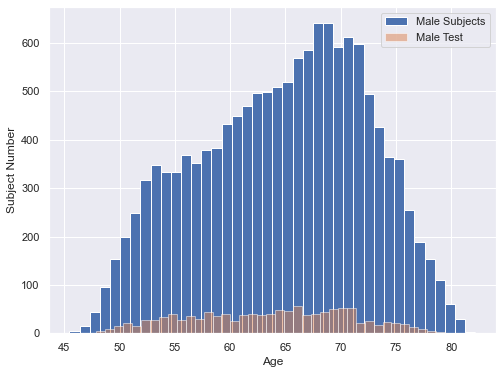

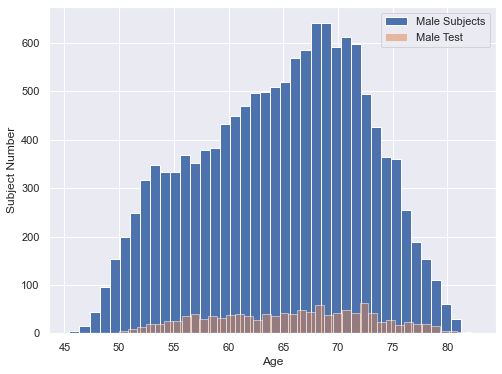

In [55]:
df_male2 = df_rs2a[df_rs2a['sex']==1]
df_female2 = df_rs2a[df_rs2a['sex']==0]
df_male2 = df_male2.drop(columns=['sex'])
df_female2 = df_female2.drop(columns=['sex'])

df_male3 = df_rs3a[df_rs3a['sex']==1]
df_female3 = df_rs3a[df_rs3a['sex']==0]
df_male3 = df_male3.drop(columns=['sex'])
df_female3 = df_female3.drop(columns=['sex'])

cut_bins = np.arange(44,85)
cut_labels = cut_bins.astype('str')
cut_labels = cut_labels[:-1]

df_male2['age_range'] = pd.cut(df_male2['age'], bins=cut_bins, precision=0)
df_female2['age_range'] = pd.cut(df_female2['age'], bins=cut_bins, precision=0)

df_male2['age_bins'] = pd.cut(df_male2['age'], bins=cut_bins, labels=cut_labels, precision=0)
df_female2['age_bins'] = pd.cut(df_female2['age'], bins=cut_bins, labels=cut_labels, precision=0)

df_male3['age_range'] = pd.cut(df_male3['age'], bins=cut_bins, precision=0)
df_female3['age_range'] = pd.cut(df_female3['age'], bins=cut_bins, precision=0)

df_male3['age_bins'] = pd.cut(df_male3['age'], bins=cut_bins, labels=cut_labels, precision=0)
df_female3['age_bins'] = pd.cut(df_female3['age'], bins=cut_bins, labels=cut_labels, precision=0)

print("Mean Age:",df_male2.age.mean())
print("Std Age:",df_male2.age.std())

print("Mean Age:",df_female2.age.mean())
print("Std Age:",df_female2.age.std())

print("Mean Age:",df_male3.age.mean())
print("Std Age:",df_male3.age.std())

print("Mean Age:",df_female3.age.mean())
print("Std Age:",df_female3.age.std())

print("Test2: ",len(df_male2))
print("Test3: ",len(df_male3))

print("Test2")
print("Mean Age:",df_male2.age.mean())
print("Std Age:",df_male2.age.std())

print("Test3")
print("Mean Age:",df_male3.age.mean())
print("Std Age:",df_male3.age.std())

plt.figure(figsize=(8,6))
df_male['age'].hist(bins=40, label='Male Subjects')
df_male2['age'].hist(bins=40, label='Male Test', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('test2_male_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

plt.figure(figsize=(8,6))
df_male['age'].hist(bins=40, label='Male Subjects')
df_male3['age'].hist(bins=40, label='Male Test', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('test3_male_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

Test2:  1264
Test3:  1264
Test2
Mean Age: 62.3357078348072
Std Age: 7.086827267999779
Test3
Mean Age: 64.59242056746469
Std Age: 7.082702907546573


Text(0, 0.5, 'Subject Number')

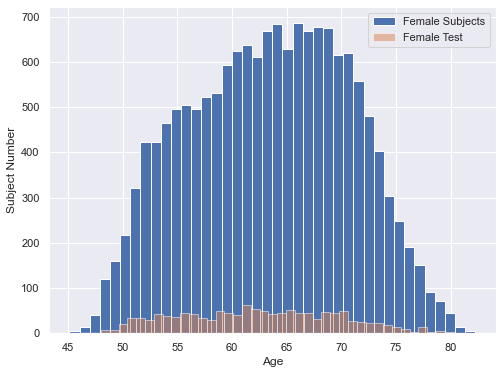

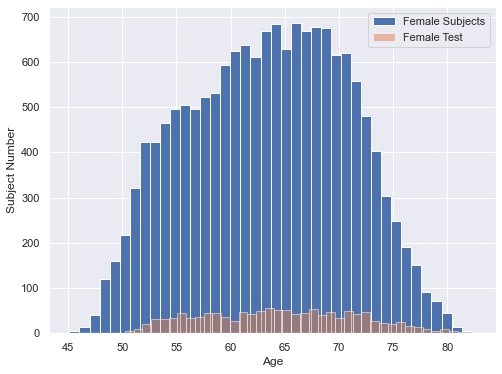

In [56]:
print("Test2: ",len(df_female2))
print("Test3: ",len(df_female3))

print("Test2")
print("Mean Age:",df_female2.age.mean())
print("Std Age:",df_female2.age.std())

print("Test3")
print("Mean Age:",df_female3.age.mean())
print("Std Age:",df_female3.age.std())

plt.figure(figsize=(8,6))
df_female['age'].hist(bins=40, label='Female Subjects')
df_female2['age'].hist(bins=40, label='Female Test', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('test2_female_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

plt.figure(figsize=(8,6))
df_female['age'].hist(bins=40, label='Female Subjects')
df_female3['age'].hist(bins=40, label='Female Test', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('test3_female_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

In [57]:
print("Test2 Male: ",len(df_male2))
print("Test3 Male: ",len(df_male3))

print("Test2 Female: ",len(df_female2))
print("Test3 Female: ",len(df_female3))

male_test2 = df_male2['subject_IDs'].to_numpy(dtype='str')
male_test3 = df_male3['subject_IDs'].to_numpy(dtype='str')

female_test2 = df_female2['subject_IDs'].to_numpy(dtype='str')
female_test3 = df_female3['subject_IDs'].to_numpy(dtype='str')

np.savetxt('male_test2.txt', male_test2, fmt='%s')
np.savetxt('male_test3.txt', male_test3, fmt='%s')
np.savetxt('female_test2.txt', female_test2, fmt='%s')
np.savetxt('female_test3.txt', female_test3, fmt='%s')

male_test_age_2 = df_male2['age'].to_numpy()
male_test_age_3 = df_male3['age'].to_numpy()

female_test_age_2 = df_female2['age'].to_numpy()
female_test_age_3 = df_female3['age'].to_numpy()

np.save('male_test_age_2.npy', df_male2)
np.save('male_test_age_3.npy', df_male3)
np.save('female_train_age_2.npy', df_female2)
np.save('female_train_age_3.npy', df_female3)

# bin_range = [44,84]
bin_range = [39,89]
bin_step = 1

# print("Generating male_test_age_labels_2")
# male_test_age_labels_2 = []
# for label in male_test_age_2:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     male_test_age_labels_2.append(bin_values)
# male_test_age_labels_2 = np.array(male_test_age_labels_2)
# np.save('male_test_age_labels_2.npy', male_test_age_labels_2)

# print("Generating male_test_age_labels_3")
# male_test_age_labels_3 = []
# for label in male_test_age_3:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     male_test_age_labels_3.append(bin_values)
# male_test_age_labels_3 = np.array(male_test_age_labels_3)
# np.save('male_test_age_labels_3.npy', male_test_age_labels_3)

# print("Generating female_test_age_labels_2")
# female_test_age_labels_2 = []
# for label in female_test_age_2:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     female_test_age_labels_2.append(bin_values)
# female_test_age_labels_2 = np.array(female_test_age_labels_2)
# np.save('female_test_age_labels_2.npy', female_test_age_labels_2)

# print("Generating female_test_age_labels_3")
# female_test_age_labels_3 = []
# for label in female_test_age_3:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     female_test_age_labels_3.append(bin_values)
# female_test_age_labels_3 = np.array(female_test_age_labels_3)
# np.save('female_test_age_labels_3.npy', female_test_age_labels_3)


Test2 Male:  1169
Test3 Male:  1169
Test2 Female:  1264
Test3 Female:  1264


Train:  1000
Val:  500
Test:  500
Mean Age: 64.64810970818507
Std Age: 7.618586307715635
Train
Mean Age: 64.60148299648182
Std Age: 7.561817852729895
Validation
Mean Age: 64.91527019237964
Std Age: 7.580753063370189
Test
Mean Age: 64.8673257728872
Std Age: 7.788627944493757


Text(0, 0.5, 'Subject Number')

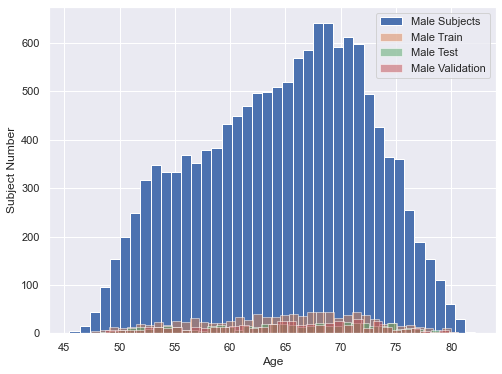

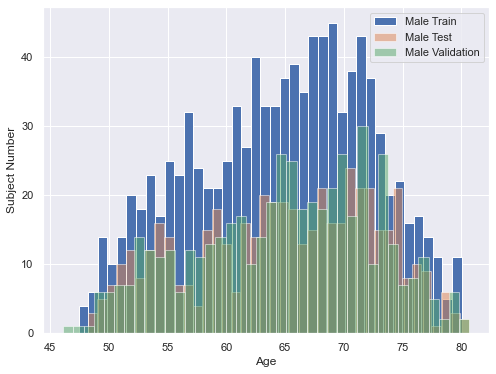

In [58]:
data_set = 2000
data_train = int(data_set * 0.5)
data_validation = int(data_set * 0.25)
data_test = int(data_set * 0.25)

df_data_set_male_tiny = df_male.sample(n=data_set, random_state=7)
df_data_train_male_tiny = df_data_set_male_tiny.sample(n=data_train, random_state=7)
df_data_set_male_tiny = pd.concat([df_data_set_male_tiny,df_data_train_male_tiny]).drop_duplicates(keep=False)
df_data_validation_male_tiny = df_data_set_male_tiny.sample(n=data_validation, random_state=7)
df_data_test_male_tiny = pd.concat([df_data_set_male_tiny,df_data_validation_male_tiny]).drop_duplicates(keep=False)

print("Train: ",len(df_data_train_male_tiny))
print("Val: ",len(df_data_validation_male_tiny))
print("Test: ",len(df_data_test_male_tiny))

print("Mean Age:",df_male.age.mean())
print("Std Age:",df_male.age.std())
print("Train")
print("Mean Age:",df_data_train_male_tiny.age.mean())
print("Std Age:",df_data_train_male_tiny.age.std())
print("Validation")
print("Mean Age:",df_data_validation_male_tiny.age.mean())
print("Std Age:",df_data_validation_male_tiny.age.std())
print("Test")
print("Mean Age:",df_data_test_male_tiny.age.mean())
print("Std Age:",df_data_test_male_tiny.age.std())

plt.figure(figsize=(8,6))
df_male['age'].hist(bins=40, label='Male Subjects')
df_data_train_male_tiny['age'].hist(bins=40, label='Male Train', alpha=0.5)
df_data_test_male_tiny['age'].hist(bins=40, label='Male Test', alpha=0.5)
df_data_validation_male_tiny['age'].hist(bins=40, label='Male Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('tiny_male_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

plt.figure(figsize=(8,6))
df_data_train_male_tiny['age'].hist(bins=40, label='Male Train')
df_data_test_male_tiny['age'].hist(bins=40, label='Male Test', alpha=0.5)
df_data_validation_male_tiny['age'].hist(bins=40, label='Male Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('tiny_male_age_distribution.png', dpi=300, facecolor='white', bbox_inches="tight")

Train:  1000
Val:  500
Test:  500
Mean Age: 63.37031671949257
Std Age: 7.339524835028476
Train
Mean Age: 63.35034489108465
Std Age: 7.4242648117949095
Validation
Mean Age: 63.347046627741584
Std Age: 7.389715564678109
Test
Mean Age: 63.65242052548845
Std Age: 7.484493479148136


Text(0, 0.5, 'Subject Number')

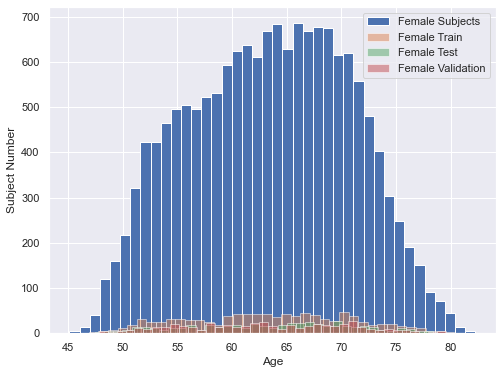

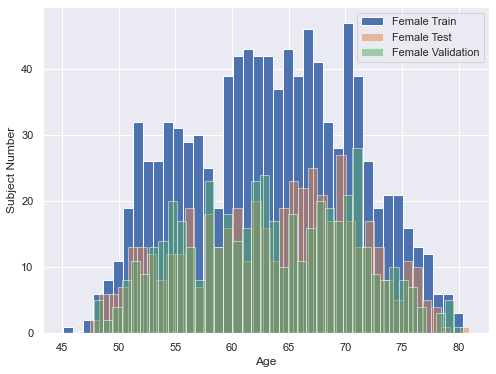

In [59]:
data_set = 2000
data_train = int(data_set * 0.5)
data_validation = int(data_set * 0.25)
data_test = int(data_set * 0.25)

df_data_set_female_tiny = df_female.sample(n=data_set, random_state=7)
df_data_train_female_tiny = df_data_set_female_tiny.sample(n=data_train, random_state=7)
df_data_set_female_tiny = pd.concat([df_data_set_female_tiny,df_data_train_female_tiny]).drop_duplicates(keep=False)
df_data_validation_female_tiny = df_data_set_female_tiny.sample(n=data_validation, random_state=7)
df_data_test_female_tiny = pd.concat([df_data_set_female_tiny,df_data_validation_female_tiny]).drop_duplicates(keep=False)

print("Train: ",len(df_data_train_female_tiny))
print("Val: ",len(df_data_validation_female_tiny))
print("Test: ",len(df_data_test_female_tiny))

print("Mean Age:",df_female.age.mean())
print("Std Age:",df_female.age.std())
print("Train")
print("Mean Age:",df_data_train_female_tiny.age.mean())
print("Std Age:",df_data_train_female_tiny.age.std())
print("Validation")
print("Mean Age:",df_data_validation_female_tiny.age.mean())
print("Std Age:",df_data_validation_female_tiny.age.std())
print("Test")
print("Mean Age:",df_data_test_female_tiny.age.mean())
print("Std Age:",df_data_test_female_tiny.age.std())

plt.figure(figsize=(8,6))
df_female['age'].hist(bins=40, label='Female Subjects')
df_data_train_female_tiny['age'].hist(bins=40, label='Female Train', alpha=0.5)
df_data_test_female_tiny['age'].hist(bins=40, label='Female Test', alpha=0.5)
df_data_validation_female_tiny['age'].hist(bins=40, label='Female Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('tiny_female_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

plt.figure(figsize=(8,6))
df_data_train_female_tiny['age'].hist(bins=40, label='Female Train')
df_data_test_female_tiny['age'].hist(bins=40, label='Female Test', alpha=0.5)
df_data_validation_female_tiny['age'].hist(bins=40, label='Female Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('tiny_female_age_distribution.png', dpi=300, facecolor='white', bbox_inches="tight")

In [64]:
male_train_tiny = df_data_train_male_tiny['subject_IDs'].to_numpy(dtype='str')
male_test_tiny = df_data_test_male_tiny['subject_IDs'].to_numpy(dtype='str')
male_validation_tiny = df_data_validation_male_tiny['subject_IDs'].to_numpy(dtype='str')

female_train_tiny = df_data_train_female_tiny['subject_IDs'].to_numpy(dtype='str')
female_test_tiny = df_data_test_female_tiny['subject_IDs'].to_numpy(dtype='str')
female_validation_tiny = df_data_validation_female_tiny['subject_IDs'].to_numpy(dtype='str')

male_train_age_tiny = df_data_train_male_tiny['age'].to_numpy()
male_test_age_tiny = df_data_test_male_tiny['age'].to_numpy()
male_validation_age_tiny = df_data_validation_male_tiny['age'].to_numpy()

female_train_age_tiny = df_data_train_female_tiny['age'].to_numpy()
female_test_age_tiny = df_data_test_female_tiny['age'].to_numpy()
female_validation_age_tiny = df_data_validation_female_tiny['age'].to_numpy()



male_train_tiny, male_train_age_tiny = correctSubjects(male_train_tiny, male_train_age_tiny, 
                                                         differenceSubjects)
male_test_tiny, male_test_age_tiny = correctSubjects(male_test_tiny, male_test_age_tiny, 
                                                       differenceSubjects)
male_validation_tiny, male_validation_age_tiny = correctSubjects(male_validation_tiny, 
                                                                   male_validation_age_tiny, 
                                                                   differenceSubjects)

female_train_tiny, female_train_age_tiny = correctSubjects(female_train_tiny, female_train_age_tiny,
                                                             differenceSubjects)
female_test_tiny, female_test_age_tiny = correctSubjects(female_test_tiny, female_test_age_tiny,
                                                           differenceSubjects)
female_validation_tiny, female_validation_age_tiny = correctSubjects(female_validation_tiny, 
                                                                       female_validation_age_tiny,
                                                                       differenceSubjects)


print('Male')
print(len(male_train_tiny), len(male_train_age_tiny))
print(len(male_test_tiny), len(male_test_age_tiny))
print(len(male_validation_tiny), len(male_validation_age_tiny))
# Train:  3000
# Val:  1000
# Test:  1000
print('Female')
print(len(female_train_tiny), len(female_train_age_tiny))
print(len(female_test_tiny), len(female_test_age_tiny))
print(len(female_validation_tiny), len(female_validation_age_tiny))
# Train:  3000
# Val:  1000
# Test:  1000



np.savetxt('male_train_tiny.txt', male_train_tiny, fmt='%s')
np.savetxt('male_test_tiny.txt', male_test_tiny, fmt='%s')
np.savetxt('male_validation_tiny.txt', male_validation_tiny, fmt='%s')
np.savetxt('female_train_tiny.txt', female_train_tiny, fmt='%s')
np.savetxt('female_test_tiny.txt', female_test_tiny, fmt='%s')
np.savetxt('female_validation_tiny.txt', female_validation_tiny, fmt='%s')

np.save('male_train_age_tiny.npy', male_train_age_tiny)
np.save('male_test_age_tiny.npy', male_test_age_tiny)
np.save('male_validation_age_tiny.npy', male_validation_age_tiny)
np.save('female_train_age_tiny.npy', female_train_age_tiny)
np.save('female_test_age_tiny.npy', female_test_age_tiny)
np.save('female_validation_age_tiny.npy', female_validation_age_tiny)

# # bin_range = [44,84]
# bin_range = [39,89]
# bin_step = 1

# print("Generating male_train_age_labels_tiny")
# male_train_age_labels_tiny = []
# for label in male_train_age_tiny:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     male_train_age_labels_tiny.append(bin_values)
# male_train_age_labels_tiny = np.array(male_train_age_labels_tiny)
# np.save('male_train_age_labels_tiny.npy', male_train_age_labels_tiny)

# print("Generating male_test_age_labels_tiny")
# male_test_age_labels_tiny = []
# for label in male_test_age_tiny:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     male_test_age_labels_tiny.append(bin_values)
# male_test_age_labels_tiny = np.array(male_test_age_labels_tiny)
# np.save('male_test_age_labels_tiny.npy', male_test_age_labels_tiny)

# print("Generating male_validation_age_labels_tiny")   
# male_validation_age_labels_tiny = []
# for label in male_validation_age_tiny:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     male_validation_age_labels_tiny.append(bin_values)
# male_validation_age_labels_tiny = np.array(male_validation_age_labels_tiny)
# np.save('male_validation_age_labels_tiny.npy', male_validation_age_labels_tiny)

# print("Generating female_train_age_labels_tiny") 
# female_train_age_labels_tiny = []
# for label in female_train_age_tiny:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     female_train_age_labels_tiny.append(bin_values)
# female_train_age_labels_tiny = np.array(female_train_age_labels_tiny)
# np.save('female_train_age_labels_tiny.npy', female_train_age_labels_tiny)

# print("Generating female_test_age_labels_tiny") 
# female_test_age_labels_tiny = []
# for label in female_test_age_tiny:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     female_test_age_labels_tiny.append(bin_values)
# female_test_age_labels_tiny = np.array(female_test_age_labels_tiny)
# np.save('female_test_age_labels_tiny.npy', female_test_age_labels_tiny)

# print("Generating female_validation_age_labels_tiny") 
# female_validation_age_labels_tiny = []
# for label in female_validation_age_tiny:
#     bin_values, bin_centers = num2vec(label, bin_range, bin_step=1, std=1)
#     female_validation_age_labels_tiny.append(bin_values)
# female_validation_age_labels_tiny = np.array(female_validation_age_labels_tiny)
# np.save('female_validation_age_labels_tiny.npy', female_validation_age_labels_tiny)

[]
[]
[]
[]
[]
[364]
Male
1000 1000
500 500
500 500
Female
1000 1000
500 500
499 499


Train:  6510
Val:  868
Test:  3472
Mean Age: 64.64810970818507
Std Age: 7.618586307715635
Train
Mean Age: 64.65016880983401
Std Age: 7.650137271307019
Validation
Mean Age: 64.81570717009157
Std Age: 7.572684855253238
Test
Mean Age: 64.39669749427632
Std Age: 7.648886958409098
Train:  6510
Val:  868
Test:  3472
Mean Age: 63.37031671949257
Std Age: 7.339524835028476
Train
Mean Age: 63.438434528509596
Std Age: 7.367655342176011
Validation
Mean Age: 63.661319531905654
Std Age: 7.189956895440735
Test
Mean Age: 63.30387261362321
Std Age: 7.268670261196855


Text(0, 0.5, 'Subject Number')

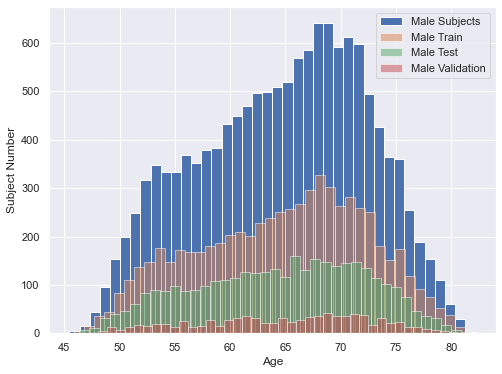

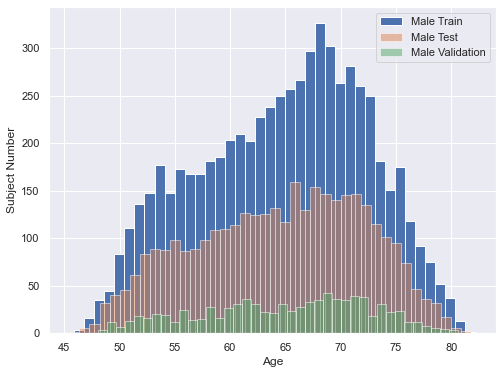

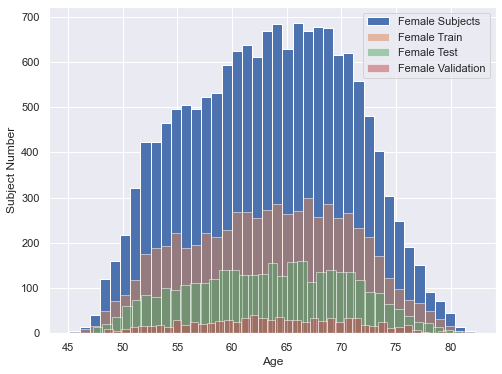

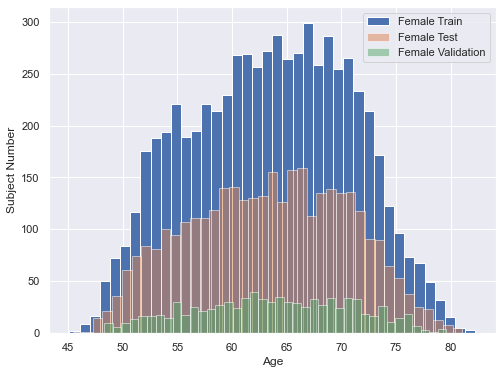

In [61]:
data_set = 10850
data_train = int(data_set * 0.6)
data_validation = int(data_set * 0.4 * 0.2)
data_test = int(data_set * 0.4 * 0.8)

df_data_set_male_han = df_male.sample(n=data_set, random_state=7)
df_data_train_male_han = df_data_set_male_han.sample(n=data_train, random_state=7)
df_data_set_male_han = pd.concat([df_data_set_male_han,df_data_train_male_han]).drop_duplicates(keep=False)
df_data_validation_male_han = df_data_set_male_han.sample(n=data_validation, random_state=7)
df_data_test_male_han = pd.concat([df_data_set_male_han,df_data_validation_male_han]).drop_duplicates(keep=False)

print("Train: ",len(df_data_train_male_han))
print("Val: ",len(df_data_validation_male_han))
print("Test: ",len(df_data_test_male_han))

print("Mean Age:",df_male.age.mean())
print("Std Age:",df_male.age.std())
print("Train")
print("Mean Age:",df_data_train_male_han.age.mean())
print("Std Age:",df_data_train_male_han.age.std())
print("Validation")
print("Mean Age:",df_data_validation_male_han.age.mean())
print("Std Age:",df_data_validation_male_han.age.std())
print("Test")
print("Mean Age:",df_data_test_male_han.age.mean())
print("Std Age:",df_data_test_male_han.age.std())

plt.figure(figsize=(8,6))
df_male['age'].hist(bins=40, label='Male Subjects')
df_data_train_male_han['age'].hist(bins=40, label='Male Train', alpha=0.5)
df_data_test_male_han['age'].hist(bins=40, label='Male Test', alpha=0.5)
df_data_validation_male_han['age'].hist(bins=40, label='Male Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('han_male_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

plt.figure(figsize=(8,6))
df_data_train_male_han['age'].hist(bins=40, label='Male Train')
df_data_test_male_han['age'].hist(bins=40, label='Male Test', alpha=0.5)
df_data_validation_male_han['age'].hist(bins=40, label='Male Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('han_male_age_distribution.png', dpi=300, facecolor='white', bbox_inches="tight")

# =======

df_data_set_female_han = df_female.sample(n=data_set, random_state=7)
df_data_train_female_han = df_data_set_female_han.sample(n=data_train, random_state=7)
df_data_set_female_han = pd.concat([df_data_set_female_han,df_data_train_female_han]).drop_duplicates(keep=False)
df_data_validation_female_han = df_data_set_female_han.sample(n=data_validation, random_state=7)
df_data_test_female_han = pd.concat([df_data_set_female_han,df_data_validation_female_han]).drop_duplicates(keep=False)

print("Train: ",len(df_data_train_female_han))
print("Val: ",len(df_data_validation_female_han))
print("Test: ",len(df_data_test_female_han))

print("Mean Age:",df_female.age.mean())
print("Std Age:",df_female.age.std())
print("Train")
print("Mean Age:",df_data_train_female_han.age.mean())
print("Std Age:",df_data_train_female_han.age.std())
print("Validation")
print("Mean Age:",df_data_validation_female_han.age.mean())
print("Std Age:",df_data_validation_female_han.age.std())
print("Test")
print("Mean Age:",df_data_test_female_han.age.mean())
print("Std Age:",df_data_test_female_han.age.std())

plt.figure(figsize=(8,6))
df_female['age'].hist(bins=40, label='Female Subjects')
df_data_train_female_han['age'].hist(bins=40, label='Female Train', alpha=0.5)
df_data_test_female_han['age'].hist(bins=40, label='Female Test', alpha=0.5)
df_data_validation_female_han['age'].hist(bins=40, label='Female Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('han_female_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

plt.figure(figsize=(8,6))
df_data_train_female_han['age'].hist(bins=40, label='Female Train')
df_data_test_female_han['age'].hist(bins=40, label='Female Test', alpha=0.5)
df_data_validation_female_han['age'].hist(bins=40, label='Female Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('han_female_age_distribution.png', dpi=300, facecolor='white', bbox_inches="tight")

Text(0, 0.5, 'Subject Number')

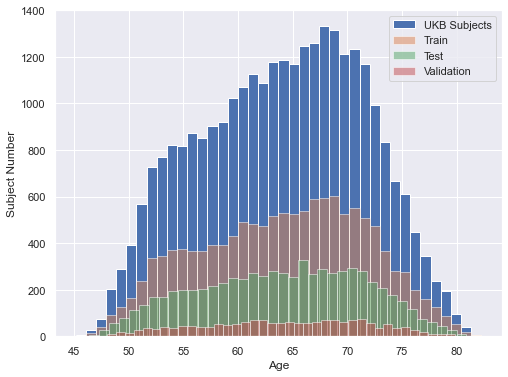

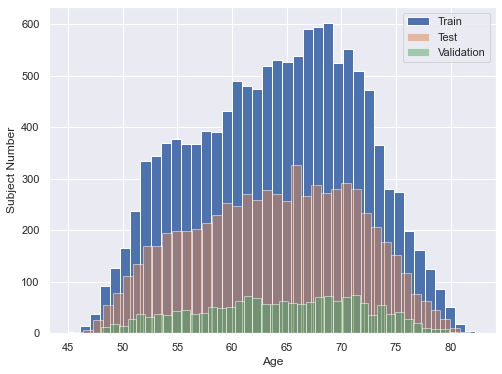

In [62]:
df_data_train_han = pd.concat([df_data_train_male_han, df_data_train_female_han])
df_data_validation_han = pd.concat([df_data_validation_male_han, df_data_validation_female_han])
df_data_test_han = pd.concat([df_data_test_male_han, df_data_test_female_han])

plt.figure(figsize=(8,6))
df_clean['age'].hist(bins=40, label='UKB Subjects')
df_data_train_han['age'].hist(bins=40, label='Train', alpha=0.5)
df_data_test_han['age'].hist(bins=40, label='Test', alpha=0.5)
df_data_validation_han['age'].hist(bins=40, label='Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('han_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

plt.figure(figsize=(8,6))
df_data_train_han['age'].hist(bins=40, label='Train', )
df_data_test_han['age'].hist(bins=40, label='Test', alpha=0.5)
df_data_validation_han['age'].hist(bins=40, label='Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('han_age_distribution.png', dpi=300, facecolor='white', bbox_inches="tight")

[ 5794 12681]
[3621 6121 5440]
[]
[15940 10495]
[3262 4510 7009]
[]


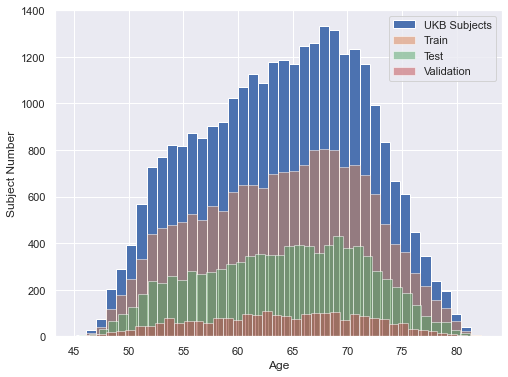

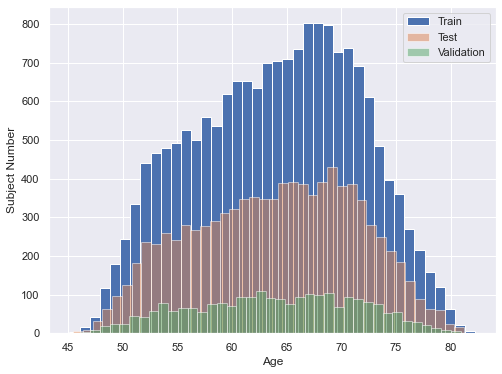

In [63]:
train_han = df_data_train_han['subject_IDs'].to_numpy(dtype='str')
test_han = df_data_test_han['subject_IDs'].to_numpy(dtype='str')
validation_han = df_data_validation_han['subject_IDs'].to_numpy(dtype='str')

train_age_han = df_data_train_han['age'].to_numpy()
test_age_han = df_data_test_han['age'].to_numpy()
validation_age_han = df_data_validation_han['age'].to_numpy()

train_han, train_age_han = correctSubjects(train_han, train_age_han,
                                                         differenceSubjects)
test_han, test_age_han = correctSubjects(test_han, test_age_han,
                                                       differenceSubjects)
validation_han, validation_age_han = correctSubjects(validation_han, validation_age_han, 
                                                                   differenceSubjects)

np.savetxt('train_han.txt', train_han, fmt='%s')
np.savetxt('test_han.txt', test_han, fmt='%s')
np.savetxt('validation_han.txt', validation_han, fmt='%s')

np.save('train_age_han.npy', train_age_han)
np.save('test_age_han.npy', test_age_han)
np.save('validation_age_han.npy', validation_age_han)

df_data_train_everything = pd.concat([df_data_train_male, df_data_train_female])
df_data_validation_everything = pd.concat([df_data_validation_male, df_data_validation_female])
df_data_test_everything = pd.concat([df_data_test_male, df_data_test_female])

plt.figure(figsize=(8,6))
df_clean['age'].hist(bins=40, label='UKB Subjects')
df_data_train_everything['age'].hist(bins=40, label='Train', alpha=0.5)
df_data_test_everything['age'].hist(bins=40, label='Test', alpha=0.5)
df_data_validation_everything['age'].hist(bins=40, label='Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('everything_age_distribution_full.png', dpi=300, facecolor='white', bbox_inches="tight")

plt.figure(figsize=(8,6))
df_data_train_everything['age'].hist(bins=40, label='Train', )
df_data_test_everything['age'].hist(bins=40, label='Test', alpha=0.5)
df_data_validation_everything['age'].hist(bins=40, label='Validation', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Subject Number')
# plt.savefig('everything_age_distribution.png', dpi=300, facecolor='white', bbox_inches="tight")

train_everything = df_data_train_everything['subject_IDs'].to_numpy(dtype='str')
test_everything = df_data_test_everything['subject_IDs'].to_numpy(dtype='str')
validation_everything = df_data_validation_everything['subject_IDs'].to_numpy(dtype='str')


train_age_everything = df_data_train_everything['age'].to_numpy()
test_age_everything = df_data_test_everything['age'].to_numpy()
validation_age_everything = df_data_validation_everything['age'].to_numpy()

train_everything, train_age_everything = correctSubjects(train_everything, train_age_everything,
                                                         differenceSubjects)
test_everything, test_age_everything = correctSubjects(test_everything, test_age_everything,
                                                       differenceSubjects)
validation_everything, validation_age_everything = correctSubjects(validation_everything, 
                                                                   validation_age_everything, 
                                                                   differenceSubjects)

np.savetxt('train_everything.txt', train_everything, fmt='%s')
np.savetxt('test_everything.txt', test_everything, fmt='%s')
np.savetxt('validation_everything.txt', validation_everything, fmt='%s')

np.save('train_age_everything.npy', train_age_everything)
np.save('test_age_everything.npy', test_age_everything)
np.save('validation_age_everything.npy', validation_age_everything)